In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from IPython.display import HTML, display

from utils.diagnostics import compute_summary_statistics
from utils.dataset_utils import aggregate_results

plt.style.use('bmh')
plt.rcParams['lines.linewidth'] = 1

In [14]:
model_names = ["mvo_ls"]
stats_order = ["E[R]", "Std(R)", "Sharpe", "Sortino", "AvgDD", "MaxDD", "% Positive Ret."]

In [15]:
all_summary = []

for model in model_names:

        output_path = os.path.join(os.getcwd(),
                                   "data",
                                   "outputs",
                                   model)
    
        summary = aggregate_results(path=output_path)

        # compute pnl
        summary["pnl"] = summary["returns"] * summary["weights"]

        # add model name
        summary["model"] = model

        # save summary
        all_summary.append(summary)
all_summary_df = pd.concat(all_summary, axis=0)

## 1) Summary Statistics of the Portfolios

In [16]:
all_stats = {}
for model in model_names:

    portfolio_returns = torch.tensor(all_summary_df.loc[all_summary_df["model"] == model].groupby("date").sum()["pnl"])
    stats = compute_summary_statistics(portfolio_returns=portfolio_returns)

    all_stats[model] = stats
all_stats_df = pd.DataFrame(all_stats).T[stats_order]

display(HTML(all_stats_df.to_html()))

,E[R],Std(R),Sharpe,Sortino,AvgDD,MaxDD,% Positive Ret.
mvo_ls,17.395756,81.623493,0.213122,0.762266,-20.131441,-60.063641,0.51818


## 2) Cummulative Returns of the Portfolios

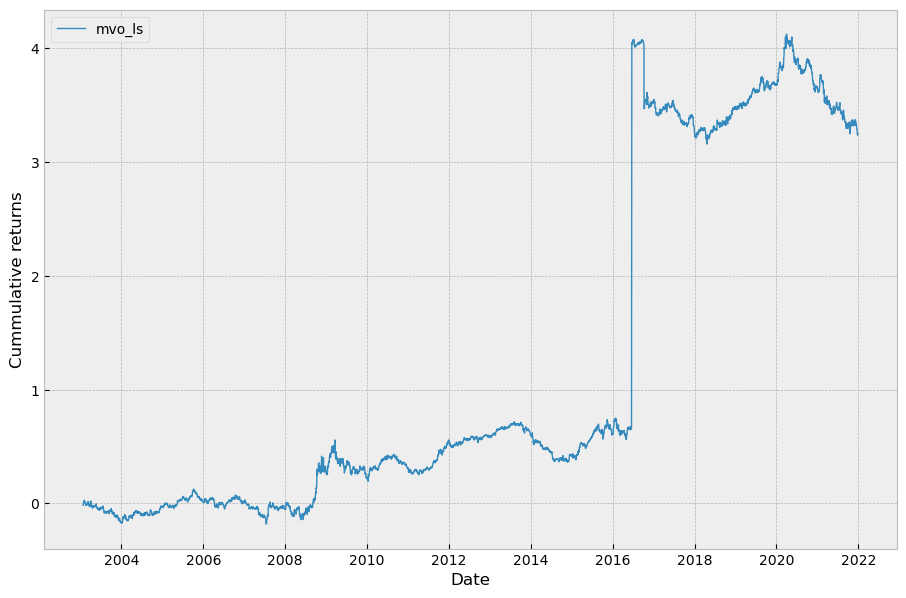

In [18]:

fig, ax = plt.subplots(figsize=(11, 7))
for model in model_names:
    summary_df = all_summary_df.loc[all_summary_df["model"] == model]
    cum_pnl_df = summary_df.groupby("date").sum()[["pnl"]].loc["2014-01-01":].cumsum().reset_index()
    ax.plot(pd.to_datetime(cum_pnl_df['date']), cum_pnl_df["pnl"], label=model)

plt.xlabel("Date")
plt.ylabel("Cummulative returns")
plt.legend(loc='best', fontsize=10)   
# fig.savefig('img/' + ticker + '_' + key1 + '_fs_methods.png')
plt.show()

## 3) Check weights

In [20]:
check_name = "mvo_ls"

all_summary_df.loc[all_summary_df["model"] == check_name, ["returns", "weights", "pnl"]].describe()

,returns,weights,pnl
count,3.122792e+06,3.122792e+06,3.122792e+06
mean,1.863488e-04,-1.705152e-12,1.039620e-06
std,2.577611e-02,5.803427e-02,1.242807e-03
min,-3.867022e+00,-4.388623e+00,-5.585156e-01
25%,-8.182287e-03,5.776438e-04,-5.403067e-06
50%,4.153252e-04,7.466415e-04,5.728602e-08
75%,9.002209e-03,9.078774e-04,6.117606e-06
max,4.039817e+00,6.645155e+01,1.730458e+00


In [21]:
all_summary_df.loc[all_summary_df["returns"] >= 1.11]

,date,ticker,returns,weights,pnl,model
607124,2006-09-26,CIEN,1.934187,0.000562,0.001086,mvo_ls
931379,2008-09-17,REV,2.334859,-0.000016,-0.000038,mvo_ls
979612,2008-12-31,BTO,1.399207,0.000390,0.000546,mvo_ls
987680,2009-01-26,HYB,1.652460,0.000618,0.001022,mvo_ls
1043857,2009-05-28,CDE,2.288196,0.000622,0.001422,mvo_ls
1060897,2009-07-02,AIG,2.746386,0.000144,0.000397,mvo_ls
1087090,2009-08-28,SFE,1.821951,0.001066,0.001942,mvo_ls
1114597,2009-10-27,UIS,2.338939,0.000617,0.001444,mvo_ls
1283961,2010-11-05,UFI,1.138181,0.000934,0.001063,mvo_ls
1313024,2011-01-10,FBP,2.710456,0.000175,0.000474,mvo_ls


<Axes: title={'center': 'AA returns'}, xlabel='date'>

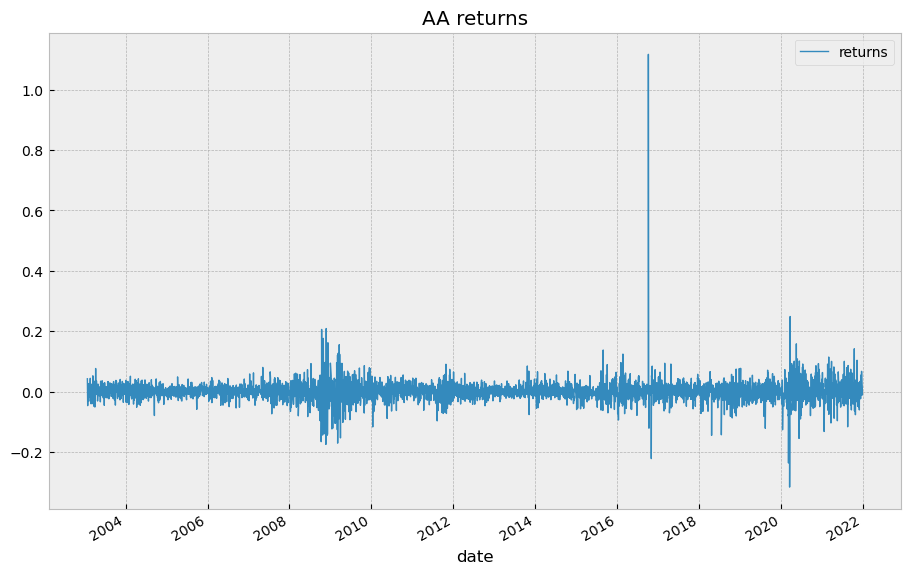

In [22]:
stock_name = "AA"

check_stock_df = all_summary_df.loc[(all_summary_df["model"] == check_name)&(all_summary_df["ticker"] == stock_name)][["date", "returns"]]
check_stock_df["date"] = pd.to_datetime(check_stock_df["date"])
check_stock_df.set_index("date", inplace=True)

check_stock_df.plot(figsize=(11, 7), title="{} returns".format(stock_name))